### EDA
Sample Question 2: Investigate the neighborhoods that have higher or lower Airbnb rental activity. Are there any notable demographic patterns that emerge between such neighborhoods?

Sample Question 3: Are there any interesting differences in Airbnb rental activity between areas with different real estate values and economic characteristics?



In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 1.1 Data Exploring

In [45]:
# listings data.
listings = pd.read_csv('listings.csv')
print(listings.head())
print("\n-------------------------------------------------------------------------------------\n")
print(listings.info())
listings.describe(include='all').transpose()

   accommodates                                          amenities  \
0           2.0  {"Wireless Internet","Air Conditioning",Kitche...   
1           4.0  {TV,"Cable TV",Internet,"Wireless Internet","A...   
2           1.0  {TV,"Wireless Internet","Air Conditioning",Kit...   
3           6.0  {Internet,"Wireless Internet","Air Conditionin...   
4           6.0  {Internet,"Wireless Internet","Free Parking on...   

   availability_30  bathrooms  bed_type  bedrooms  beds cancellation_policy  \
0                0        1.0  Real Bed       1.0   1.0            moderate   
1               17        1.0  Real Bed       1.0   2.0              strict   
2               29        1.0  Real Bed       1.0   1.0            flexible   
3               28        2.5  Real Bed       1.0   6.0            moderate   
4               25        2.5  Real Bed       1.0   6.0            moderate   

        city  has_availability  ...  review_scores_checkin  \
0  Asheville               NaN  ...       

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
accommodates,50321.0,NaN,NaN,NaN,3.845094,2.67786,1.0,2.0,3.0,5.0,16.0
amenities,50321,44220,{},592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_30,50321.0,NaN,NaN,NaN,13.903877,11.331614,0.0,1.0,13.0,25.0,30.0
bathrooms,50174.0,NaN,NaN,NaN,1.418942,0.818857,0.0,1.0,1.0,2.0,8.0
bed_type,50321,5,Real Bed,49062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,50277.0,NaN,NaN,NaN,1.497126,1.066181,0.0,1.0,1.0,2.0,10.0
beds,50229.0,NaN,NaN,NaN,2.058572,1.63397,0.0,1.0,1.0,3.0,16.0
cancellation_policy,50321,6,strict,22277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,50321,195,los angeles,19515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_availability,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# Check duplicates.
listings.duplicated().sum()

0

In [94]:
# Check null values.
listings.isnull().sum()

accommodates                       0
amenities                          0
availability_30                    0
bathrooms                        147
bed_type                           0
bedrooms                          44
beds                              92
cancellation_policy                0
city                               0
has_availability               50321
host_id                            0
id                                 0
instant_bookable                   0
latitude                           0
longitude                          0
metropolitan                       0
name                               8
price                              0
property_type                      0
review_scores_checkin          12781
review_scores_cleanliness      12731
review_scores_communication    12732
review_scores_location         12784
review_scores_rating           12675
review_scores_value            12799
room_type                          0
state                              0
w

In [48]:
# Pre-clean the dataset and convert datatypes into usable formats.
price_str = listings['price'].str[1:-3]
listings['price'] = price_str.str.extract('(\d+)').astype(int)
listings['price']

0        105
1        125
2         45
3         24
4         24
        ... 
50316     75
50317    205
50318    500
50319     65
50320    500
Name: price, Length: 50321, dtype: int64

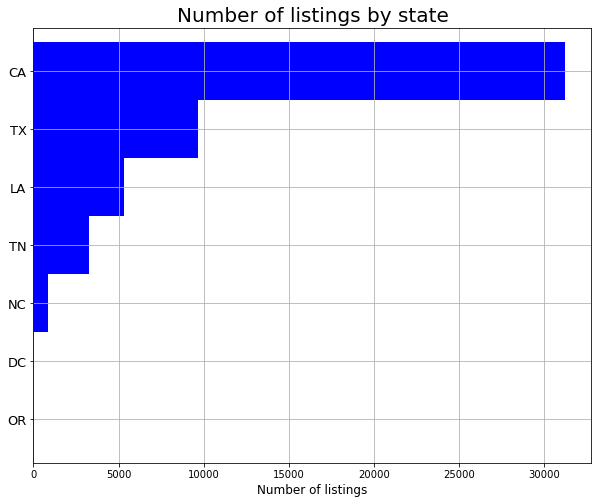

In [80]:
# Distribution of regions.
freq=listings['state'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), color='blue', grid=True, width=1)
plt.title("Number of listings by state", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

In [63]:
# Only one listing in DC and one listing in OR.
OR=listings[listings['state']=='OR']
OR

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
8990,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",30,1.0,Pull-out Sofa,1.0,1.0,flexible,portland,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Shared room,OR,NaN,97202.0


In [65]:
# Property types.
listings.property_type.unique()

array(['House', 'Tent', 'Dorm', 'Bed & Breakfast', 'Villa', 'Apartment',
       'Loft', 'Camper/RV', 'Townhouse', 'Bungalow', 'Cabin', 'Treehouse',
       'Earth House', 'Other', 'Yurt', 'Condominium', 'Chalet',
       'Guesthouse', 'Boutique hotel', 'Serviced apartment', 'Boat',
       'Nature lodge', 'Lighthouse', 'Island', 'Tipi', 'Hostel',
       'Entire Floor', 'Castle', 'Guest suite', 'Timeshare', 'Train',
       'Vacation home', 'In-law', 'Plane', 'Hut', 'Parking Space',
       'Casa particular', 'Cave'], dtype=object)

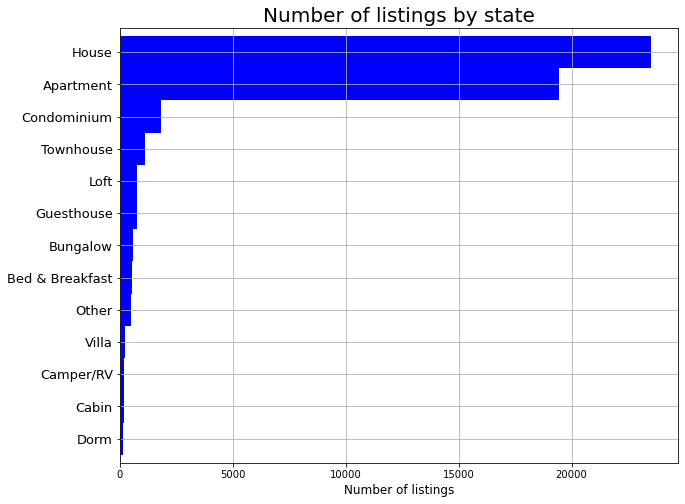

In [81]:
# Visualize distribution of property types.
freq2=listings['property_type'].value_counts().sort_values(ascending=True)
freq2.drop(freq2[freq2 < 100].index, inplace=True)
freq2.plot.barh(figsize=(10, 8), color='blue', grid=True, width=1)
plt.title("Number of listings by state", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

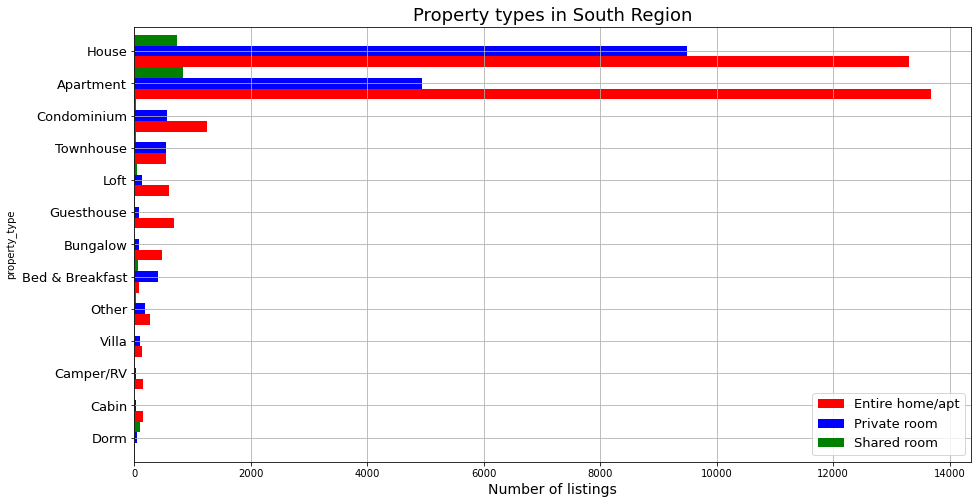

In [77]:
# Visualize distribution of property types by room types.
group1 = listings.groupby(['property_type','room_type']).room_type.count()
group1 = group1.unstack()
group1['total'] = group1.iloc[:,0:3].sum(axis = 1)
group1 = group1.sort_values(by=['total'])
group1 = group1[group1['total']>=100]
group1 = group1.drop(columns=['total'])

group1.plot(kind='barh', color = ["r","b","g"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in South Region', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

Text(0.5, 1.0, 'NC')

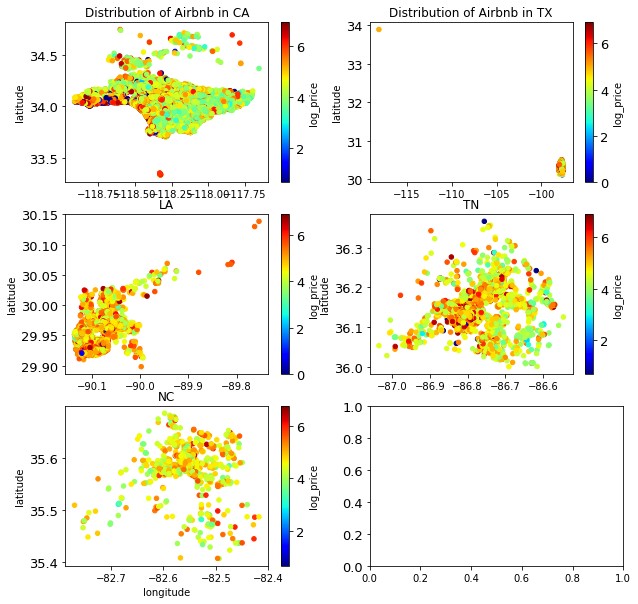

In [128]:
# Visualization of Maps
import matplotlib.pyplot as plt
%matplotlib inline
import mplleaflet as mpll

listings_TX = listings[listings['state'] == 'TX']
listings_LA = listings[listings['state'] == 'LA']
listings_TN = listings[listings['state'] == 'TN']
listings_NC = listings[listings['state'] == 'NC']
listings_CA = listings[listings['state'] == 'CA']

# f, ax = plt.subplots(figsize=(15, 10))

# listings_TX.plot(kind='scatter', x='longitude', y='latitude', s=3, color='blue', linewidth=1, ax=ax)

# mpll.display()

fig, ax = plt.subplots(3,2,figsize=(10,10))
listings_CA.plot(x='longitude',y='latitude', c='log_price',kind='scatter',cmap='jet',ax=ax[0][0],zorder=5)
ax[0][0].set_xlabel('', fontsize=12)
ax[0][0].set_title('Distribution of Airbnb in CA', fontsize=12)
listings_TX.plot(x='longitude',y='latitude', c='log_price',kind='scatter',cmap='jet',ax=ax[0][1],zorder=5)
ax[0][1].set_xlabel('', fontsize=12)
ax[0][1].set_title('Distribution of Airbnb in TX', fontsize=12)
listings_LA.plot(x='longitude',y='latitude', c='log_price',kind='scatter',cmap='jet',ax=ax[1][0],zorder=5)
ax[1][0].set_xlabel('', fontsize=12)
ax[1][0].set_title('LA', fontsize=12)
listings_TN.plot(x='longitude',y='latitude', c='log_price',kind='scatter',cmap='jet',ax=ax[1][1],zorder=5)
ax[1][1].set_xlabel('', fontsize=12)
ax[1][1].set_title('TN', fontsize=12)
listings_NC.plot(x='longitude',y='latitude', c='log_price',kind='scatter',cmap='jet',ax=ax[2][0],zorder=5)
ax[2][0].set_title('NC', fontsize=12)

### 1.2 Listing Price

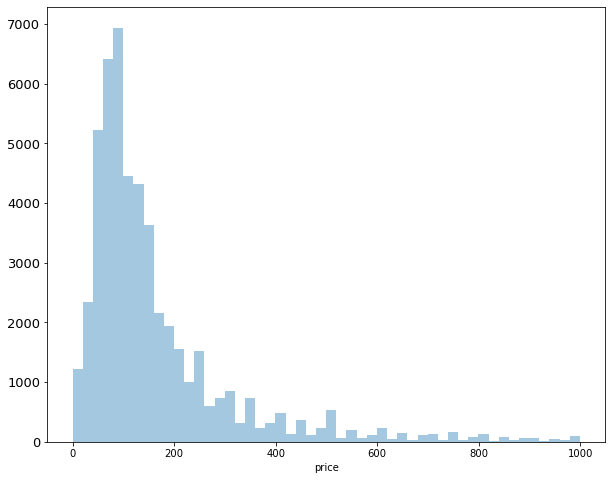

In [85]:
plt.figure(figsize=(10,8))
sns.distplot(listings['price'],kde = False)
plt.show()

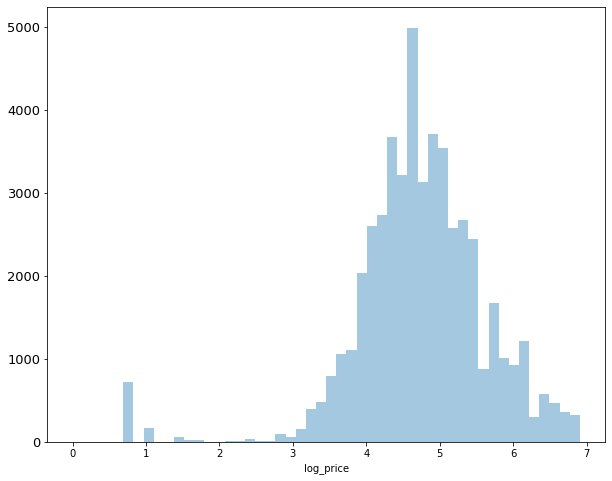

In [89]:
# Need to do normalization.
listings['log_price'] = np.log(listings['price']+1)

plt.figure(figsize=(10,8))
sns.distplot(listings['log_price'],kde = False)
plt.show()

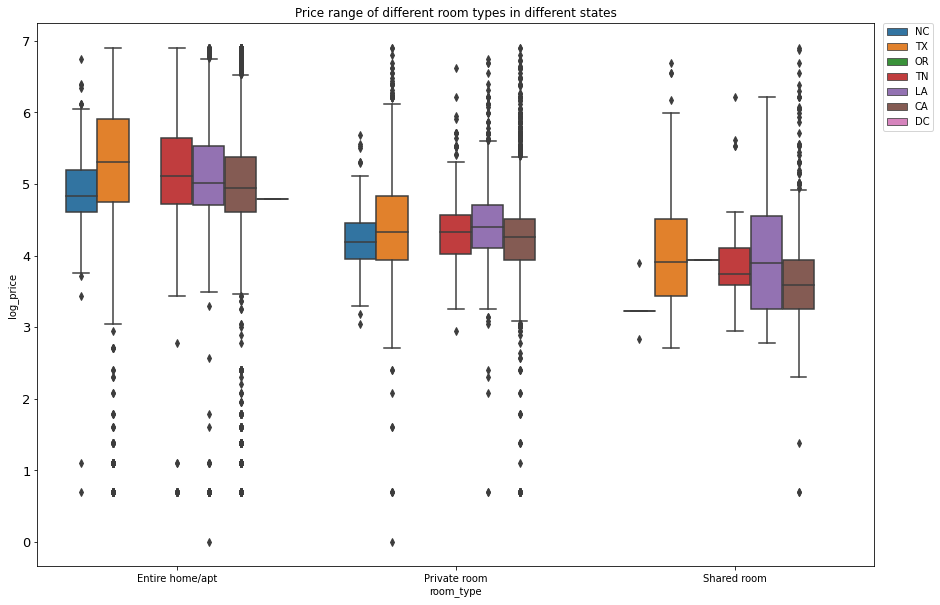

In [115]:
plt.figure(figsize=(15,10))

#Categorizing log_price into neighbourhood_group for differnt room types
#Looks like entire home/apt are more likely to have a higher price.
sns.boxplot(x="room_type", y="log_price",hue="state",data=listings)
plt.title('Price range of different room types in different states')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

In [141]:
wk_price = listings['weekly_price'].str[1:-3]
listings['weekly_price'] = wk_price.str.extract('(\d+)').astype(float)
listings['weekly_price']

0        650.0
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
50316      NaN
50317      NaN
50318      NaN
50319      NaN
50320      NaN
Name: weekly_price, Length: 50321, dtype: float64

<AxesSubplot:>

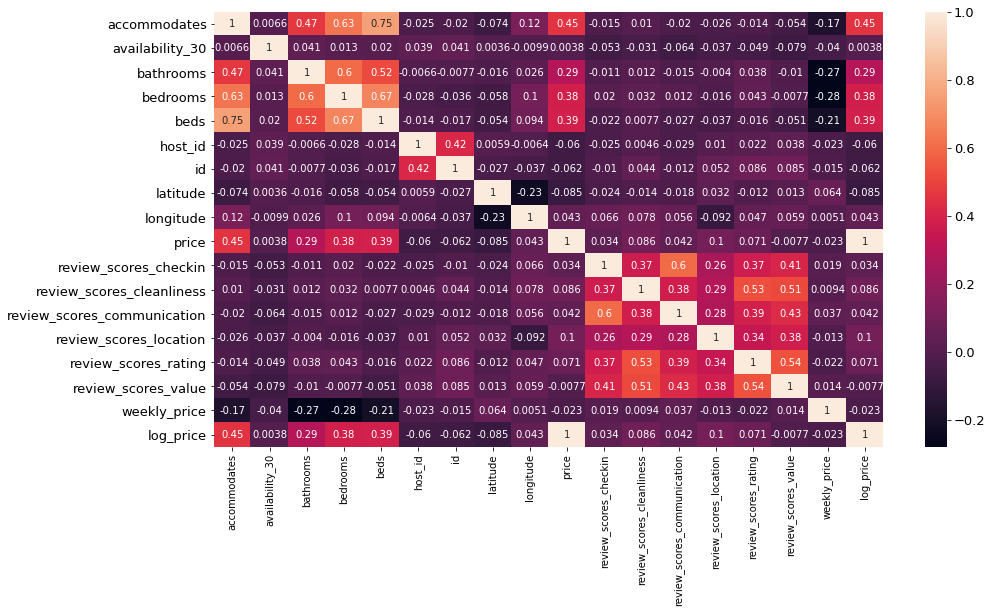

In [143]:
# Find correlation among the variables. We use kendall correlation here because the assumption is non-parametric.
listings = listings.drop(['has_availability'], axis=1)
corr = listings.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [182]:
# Import calendar, real_estate, venues data.
calendar = pd.read_csv('calendar.csv.gz', compression='gzip')
real_estate = pd.read_csv('real_estate.csv.gz', compression='gzip')
venues = pd.read_csv('venues.csv.gz', compression='gzip')

In [175]:
# Calendar dataset.
calendar['price'].isnull().sum()

8561996

In [185]:
calendar[calendar['available'] == 't'].head(20)

,listing_id,date,available,price,metro_area
39,665257,2016-05-31,t,105.0,asheville
40,665257,2016-06-01,t,105.0,asheville
41,665257,2016-06-02,t,105.0,asheville
42,665257,2016-06-03,t,105.0,asheville
43,665257,2016-06-04,t,105.0,asheville
44,665257,2016-06-05,t,105.0,asheville
45,665257,2016-06-06,t,105.0,asheville
46,665257,2016-06-07,t,105.0,asheville
47,665257,2016-06-08,t,105.0,asheville
48,665257,2016-06-09,t,105.0,asheville


In [171]:
calendar.listing_id.value_counts()

18332319    730
17480730    730
13941107    730
17424700    365
10139861    365
           ... 
13700159    365
9651318     365
17463120    365
16648670    365
17882596    365
Name: listing_id, Length: 50364, dtype: int64

In [184]:
price_str2 = calendar['price'].str[1:-3]
calendar['price'] = price_str2.str.extract('(\d+)').astype(float).round(0)
calendar['price']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
            ..
18383950   NaN
18383951   NaN
18383952   NaN
18383953   NaN
18383954   NaN
Name: price, Length: 18383955, dtype: float64

In [187]:
calendar['date'] = pd.to_datetime(calendar['date'])
print(calendar.head())
print("\n-------------------------------------------------------------------------------------\n")
print(calendar.info())
calendar.describe(include='all').transpose()

   listing_id       date available  price metro_area
0      665257 2016-04-22         f    NaN  asheville
1      665257 2016-04-23         f    NaN  asheville
2      665257 2016-04-24         f    NaN  asheville
3      665257 2016-04-25         f    NaN  asheville
4      665257 2016-04-26         f    NaN  asheville

-------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383955 entries, 0 to 18383954
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   listing_id  int64         
 1   date        datetime64[ns]
 2   available   object        
 3   price       float64       
 4   metro_area  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 701.3+ MB
None


<ipython-input-187-586734ddb976>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  calendar.describe(include='all').transpose()


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
listing_id,18383955.0,NaN,NaN,NaN,NaT,NaT,10461463.836738,5531408.170981,109.0,5661043.0,11378190.0,15392750.0,19038571.0
date,18383955,773,2017-07-24 00:00:00,49503,2016-04-20,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
available,18383955,2,t,9821959,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,9821959.0,NaN,NaN,NaN,NaT,NaT,172.097202,162.302439,1.0,75.0,120.0,200.0,999.0
metro_area,18383955,5,LA,11408440,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-145-30c9ddb7bb29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_avl['available'] = calendar_avl.available.map( lambda x: 0 if x == 'f' else 1)


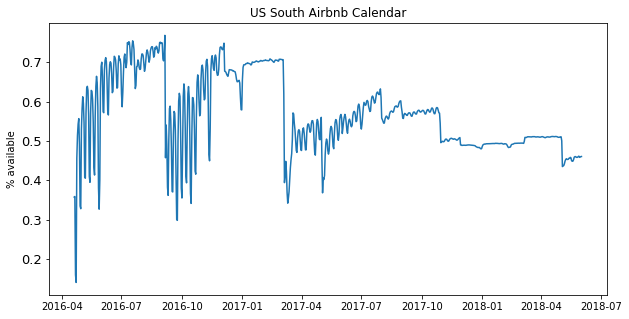

In [145]:
# Now we want to check for seasonality in the supply.
calendar_avl = calendar[['date', 'available']]
calendar_avl['available'] = calendar_avl.available.map( lambda x: 0 if x == 'f' else 1)
calendar_avl = calendar_avl.groupby('date')['available'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(calendar_avl['date'], calendar_avl['available'])
plt.title('US South Airbnb Calendar')
plt.ylabel('% available')
plt.show();

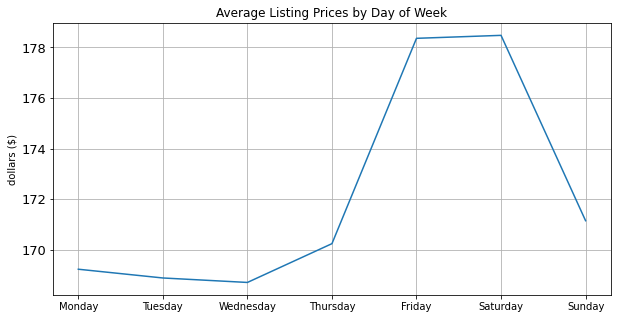

In [198]:
# We also want to see if there are day of week effects in the calendar data.
calendar['dayofweek'] = calendar['date'].dt.day_name()
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
price_week=calendar[calendar.price.notnull()][['dayofweek','price']]
price_week = calendar.groupby(['dayofweek']).mean().reindex(days)
price_week.drop('listing_id', axis=1, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(price_week)
plt.title('Average Listing Prices by Day of Week')
plt.ylabel('dollars ($)')
plt.grid()
plt.show()
# ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
# labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
# plt.xticks(ticks, labels)

In [14]:
# demographics data.
demographics = pd.read_csv('demographics.csv')
print(demographics.head())
print("\n-------------------------------------------------------------------------------------\n")
print(demographics.info())
demographics.describe(include='all').transpose()

   zipcode  population  5_years_or_less  5-9_years  10-14_years  15-19_years  \
0      601       17982            17982       1006         1080         1342   
1      602       40260            40260       2006         2440         2421   
2      603       52408            52408       2664         3177         3351   
3      606        6331             6331        347          331          461   
4      610       28328            28328       1438         1490         2044   

   20-24_years  25-34_years  35-44_years  45-54_years  ...  $10,000-$14,999  \
0         1352         1321         2253         2149  ...             48.1   
1         2953         2865         5124         5139  ...             31.4   
2         3685         3585         6473         6775  ...               31   
3          474          469          707          933  ...             45.3   
4         2122         1985         3358         3778  ...             26.9   

   $15,000-$24,999  $25,000-$34,999  $35,000

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
zipcode,33120.0,NaN,NaN,NaN,49666.334209,27564.925769,601.0,26634.75,49739.0,72123.5,99929.0
population,33120.0,NaN,NaN,NaN,9664.375151,14237.949376,0.0,718.75,2808.0,13139.25,114982.0
5_years_or_less,33120.0,NaN,NaN,NaN,9664.375151,14237.949376,0.0,718.75,2808.0,13139.25,114982.0
5-9_years,33120.0,NaN,NaN,NaN,607.095622,1004.262799,0.0,33.0,150.0,754.0,16998.0
10-14_years,33120.0,NaN,NaN,NaN,625.481582,1004.665379,0.0,37.0,165.0,794.0,13509.0
15-19_years,33120.0,NaN,NaN,NaN,631.631975,998.328444,0.0,39.0,175.0,814.0,10411.0
20-24_years,33120.0,NaN,NaN,NaN,652.501872,1044.958346,0.0,41.0,177.0,826.25,12815.0
25-34_years,33120.0,NaN,NaN,NaN,690.229831,1262.651196,0.0,33.0,156.0,798.0,24060.0
35-44_years,33120.0,NaN,NaN,NaN,1308.378019,2203.234802,0.0,67.0,292.0,1549.25,26926.0
45-54_years,33120.0,NaN,NaN,NaN,1241.185296,1951.60322,0.0,74.0,322.0,1598.0,18739.0


In [15]:
# econ_state data.
econ_state = pd.read_csv('econ_state.csv')
print(econ_state.head())
print("\n-------------------------------------------------------------------------------------\n")
print(econ_state.info())
econ_state.describe(include='all').transpose()

  state  2005Q1_gdp  2005Q2_gdp  2005Q3_gdp  2005Q4_gdp  2006Q1_gdp  \
0    AL      153332      155940      157437      160293      161934   
1    AK       37517       38907       40691       43138       42872   
2    AZ      218206      224496      231629      235099      241787   
3    AR       88446       89264       90515       93050       93413   
4    CA     1722091     1747827     1787427     1809426     1857944   

   2006Q2_gdp  2006Q3_gdp  2006Q4_gdp  2007Q1_gdp  ...  2016/03_ur  \
0      163974      165470      166495      166821  ...         6.6   
1       44653       45349       45840       46658  ...         5.9   
2      244659      250886      256505      258078  ...         4.1   
3       95259       95481       95203       94289  ...         5.5   
4     1865835     1886549     1907754     1915172  ...         5.6   

   2016/04_ur  2016/05_ur  2016/06_ur  2016/07_ur  2016/08_ur  2016/09_ur  \
0         6.6         6.6         6.7         6.7         6.7         6.6  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state,51,51,WI,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005Q1_gdp,51.0,NaN,NaN,NaN,249731.333333,303362.563159,23276.0,64611.5,145585.0,315219.5,1722091.0
2005Q2_gdp,51.0,NaN,NaN,NaN,252863.019608,307696.335944,23371.0,65307.5,146010.0,319147.0,1747827.0
2005Q3_gdp,51.0,NaN,NaN,NaN,257382.078431,314473.029475,23584.0,66352.0,147654.0,322202.0,1787427.0
2005Q4_gdp,51.0,NaN,NaN,NaN,260820.588235,319010.938811,23924.0,67785.0,150891.0,326355.0,1809426.0
...,...,...,...,...,...,...,...,...,...,...,...
2016/08_ur,51.0,NaN,NaN,NaN,4.658824,0.985328,2.9,4.0,4.9,5.3,6.8
2016/09_ur,51.0,NaN,NaN,NaN,4.637255,0.982031,2.8,4.0,4.9,5.3,6.8
2016/10_ur,51.0,NaN,NaN,NaN,4.596078,0.995181,2.8,4.0,4.8,5.2,6.8
2016/11_ur,51.0,NaN,NaN,NaN,4.570588,0.998458,2.8,4.0,4.8,5.2,6.7


In [8]:
econ_state.head(30)

,state,2005Q1_gdp,2005Q2_gdp,2005Q3_gdp,2005Q4_gdp,2006Q1_gdp,2006Q2_gdp,2006Q3_gdp,2006Q4_gdp,2007Q1_gdp,...,2016/03_ur,2016/04_ur,2016/05_ur,2016/06_ur,2016/07_ur,2016/08_ur,2016/09_ur,2016/10_ur,2016/11_ur,2016/12_ur
0,AL,153332,155940,157437,160293,161934,163974,165470,166495,166821,...,6.6,6.6,6.6,6.7,6.7,6.7,6.6,6.6,6.6,6.6
1,AK,37517,38907,40691,43138,42872,44653,45349,45840,46658,...,5.9,5.8,5.8,5.8,5.8,5.9,6.0,6.1,6.2,6.3
2,AZ,218206,224496,231629,235099,241787,244659,250886,256505,258078,...,4.1,4.1,4.1,4.1,4.0,4.0,4.0,4.0,4.0,3.9
3,AR,88446,89264,90515,93050,93413,95259,95481,95203,94289,...,5.5,5.4,5.3,5.3,5.2,5.1,5.1,5.0,5.0,5.0
4,CA,1722091,1747827,1787427,1809426,1857944,1865835,1886549,1907754,1915172,...,5.6,5.5,5.5,5.5,5.4,5.4,5.3,5.3,5.3,5.2
5,CO,216906,218710,222780,223421,229476,229632,234160,234411,237933,...,3.3,3.3,3.4,3.4,3.4,3.3,3.2,3.1,3.0,3.0
6,CT,207262,210134,210233,213052,221025,220596,220677,223380,235095,...,5.4,5.4,5.3,5.2,5.1,4.9,4.8,4.6,4.5,4.4
7,DE,52121,51156,51480,58232,55333,56670,56397,55606,56466,...,6.2,6.1,6.1,6.1,6.0,6.0,5.9,5.8,5.8,5.7
8,DC,82522,83530,83845,84446,86260,86981,89166,87577,90741,...,4.4,4.4,4.4,4.4,4.4,4.3,4.3,4.3,4.3,4.3
9,FL,680384,690146,713393,717145,733443,740698,747163,763377,760435,...,4.9,4.9,4.9,4.9,4.9,4.9,4.9,4.9,4.9,4.9


In [9]:
real_estate.head(20)

,type,zipcode,city,state,metro,county,size_rank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,ZHVI,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1137500,1137700,1152700,1156000.0,1140200,1130000,1131900,1149600,1198400,1247000
1,ZHVI,60657,Chicago,IL,Chicago,Cook,2,146700.0,146500.0,146300.0,...,318200,318100,318800,320200.0,320800,322000,323800,326100,327800,329100
2,ZHVI,60614,Chicago,IL,Chicago,Cook,3,198000.0,195500.0,194200.0,...,401900,406000,414100,417800.0,417400,418400,414100,404100,406400,415500
3,ZHVI,79936,El Paso,TX,El Paso,El Paso,4,70800.0,71000.0,71000.0,...,113800,113900,114100,114500.0,114900,115000,114700,114700,114800,114700
4,ZHVI,60640,Chicago,IL,Chicago,Cook,5,102300.0,101300.0,100700.0,...,198800,199200,200100,201500.0,203000,205100,206700,206500,206200,206700
5,ZHVI,77084,Houston,TX,Houston,Harris,6,75600.0,75400.0,75100.0,...,160400,160300,160400,159200.0,157000,154700,153500,154200,156700,158200
6,ZHVI,94109,San Francisco,CA,San Francisco,San Francisco,7,298200.0,295700.0,296400.0,...,1105500,1109500,1118200,1125900.0,1128200,1128700,1131900,1138700,1144600,1147900
7,ZHVI,75070,McKinney,TX,Dallas-Fort Worth,Collin,8,NaN,NaN,NaN,...,298800,301000,303400,304800.0,305600,307400,309800,312100,314100,315300
8,ZHVI,11226,New York,NY,New York,Kings,9,NaN,NaN,NaN,...,583600,594800,605200,612100.0,612800,616900,628900,644200,653500,658700
9,ZHVI,77449,Cypress,TX,Houston,Harris,10,72100.0,72300.0,72100.0,...,160500,161800,162600,161600.0,159100,156400,155200,156400,159400,161000


In [10]:
venues.head(20)

,city,id,latitude,longitude,name,rating,types
0,asheville,8736e812595db852ccab223019a477b918b64d4d,35.442805,-82.264081,The Esmeralda Inn & Restaurant,4.4,"['lodging', 'restaurant', 'food', 'point_of_in..."
1,asheville,479c99c6cc5aa91a6161fecc48bd24258a74bd58,35.564035,-82.278943,Straightaway Cafe,4.5,"['restaurant', 'food', 'point_of_interest', 'e..."
2,asheville,3e41ce673ee203416cb6f44894e49b2ee93347b1,35.564140,-82.278953,straightaway cafe,NaN,"['restaurant', 'food', 'point_of_interest', 'e..."
3,asheville,ce0b0e6fc251f546370fed20d39778ea796e5475,35.646791,-82.299074,The Huckleberry Cafe,5.0,"['restaurant', 'food', 'point_of_interest', 'e..."
4,asheville,f60446561634f4d44e6563dcf17f2b65eb4096f2,35.752135,-82.273258,Mount Mitchell State Park- Restaurant,4.0,"['restaurant', 'food', 'point_of_interest', 'e..."
5,asheville,a5dbad21d509663843a5057c4f4ac5ea179661aa,35.608196,-82.318476,Wendy's,3.7,"['restaurant', 'food', 'point_of_interest', 'e..."
6,asheville,27ca7c828ec648d41b27a0aa922f805abbd13be4,35.606098,-82.319344,Phil's Bar-B-Que Pit,4.3,"['restaurant', 'food', 'point_of_interest', 'e..."
7,asheville,fe0365647fd1637fb8c356243542d669485fba3b,35.603353,-82.318356,Sake Sushi,4.7,"['restaurant', 'food', 'point_of_interest', 'e..."
8,asheville,f260f46319a6054b22e26d6d61d1784c9ed05a39,35.608196,-82.318476,Tar Heel Capital Corporation No 2,5.0,"['restaurant', 'food', 'point_of_interest', 'e..."
9,asheville,5b93738190a308683fcc380eb92dcf3a6b272478,35.608165,-82.319634,Taco Bell,3.4,"['meal_takeaway', 'restaurant', 'food', 'point..."


In [205]:
passenger = pd.read_excel('Airport_passenger.xlsx')

In [206]:
passenger.head(20)

,City,Year,Month,Passenger
0,Asheville,2002,10,22043.0
1,Asheville,2002,11,18349.0
2,Asheville,2002,12,17203.0
3,Asheville,2003,1,11490.0
4,Asheville,2003,2,12069.0
5,Asheville,2003,3,14204.0
6,Asheville,2003,4,15070.0
7,Asheville,2003,5,17843.0
8,Asheville,2003,6,21966.0
9,Asheville,2003,7,23865.0


In [208]:
passenger['Year_month'] = pd.to_datetime(passenger[['Year', 'Month']].assign(DAY=1))

In [210]:
passenger['Year_month'] = passenger['Year_month'].dt.strftime('%Y-%m')

In [211]:
passenger

,City,Year,Month,Passenger,Year_month
0,Asheville,2002,10,22043.0,2002-10
1,Asheville,2002,11,18349.0,2002-11
2,Asheville,2002,12,17203.0,2002-12
3,Asheville,2003,1,11490.0,2003-01
4,Asheville,2003,2,12069.0,2003-02
...,...,...,...,...,...
1105,Los Angeles,2020,11,993921.0,2020-11
1106,Los Angeles,2020,12,913498.0,2020-12
1107,Los Angeles,2021,1,NaN,2021-01
1108,Los Angeles,2021,2,NaN,2021-02


In [212]:
passenger_1 = passenger[['City', 'Year_month', 'Passenger']]

In [213]:
passenger_1

,City,Year_month,Passenger
0,Asheville,2002-10,22043.0
1,Asheville,2002-11,18349.0
2,Asheville,2002-12,17203.0
3,Asheville,2003-01,11490.0
4,Asheville,2003-02,12069.0
...,...,...,...
1105,Los Angeles,2020-11,993921.0
1106,Los Angeles,2020-12,913498.0
1107,Los Angeles,2021-01,NaN
1108,Los Angeles,2021-02,NaN


In [216]:
passenger_1.to_csv('passenger_data.csv')

In [217]:
p2 = passenger_1.copy()

In [219]:
estab = pd.read_excel('2009_estab.xlsx')

In [220]:
estab

,MSA,Establishment
0,Austin,40281
1,Asheville,11639
2,Los Angeles,333006
3,Nashville,37883
4,New Orleans,29100


In [234]:
google = pd.read_csv('multiTimeline_.csv', header=None, names = ['month', 'airbnb'])

In [235]:
google = google.iloc[2:, :]

In [238]:
google['airbnb'].replace({"<1":0}, inplace=True)

In [241]:
google['airbnb'] = google['airbnb'].astype(int)

In [246]:
google['month'] = pd.to_datetime(google['month']).dt.strftime('%Y-%m')

In [247]:
google

,month,airbnb
2,2009-01,0
3,2009-02,0
4,2009-03,0
5,2009-04,0
6,2009-05,0
...,...,...
129,2019-08,91
130,2019-09,77
131,2019-10,74
132,2019-11,69


In [248]:
google.to_csv('google_index.csv')

In [249]:
estab.to_csv('09_estab.csv')

In [262]:
def get_log_hpi(df, city):
  df_city = df[df['city'] == city].copy()
  df_city['log HPI'] = np.log(df_city['housing price index'])
  df_city = df_city.drop(['city','housing price index'], axis=1)
  df_city['date'] = pd.to_datetime(df_city['Year_month'])
  df_city = df_city[df_city['date'] < "2020-01-01"]

  baseline = df_city[df_city['Year_month'] == '2012-01']['log HPI'].iloc[0]
  std = np.std(df_city['log HPI'])
  df_city['log HPI'] = (df_city['log HPI'] - baseline)/std
  df_city = df_city.rename(columns = {'log HPI': city})
  df_city = df_city.drop(columns = 'date')
  return df_city

In [263]:
hpi_log_la = get_log_hpi(hpi,'Los Angeles')
hpi_log_NO = get_log_hpi(hpi, 'New Orleans')
hpi_log_NA = get_log_hpi(hpi, 'Nashville')
hpi_log_Aus = get_log_hpi(hpi, 'Austin')
hpi_log_Ash = get_log_hpi(hpi, 'Asheville')

NameError: name 'hpi' is not defined

In [264]:
ax = hpi_log_Ash.plot(x='Year_month', y='Asheville', colormap='Dark2', figsize=(14, 7))
ax.set_xlabel('Year')
ax.set_ylabel('log House Price Index')
ax.set_title('Zillow Home Value Index')

hpi_log_NO.plot(x='Year_month', y='New Orleans', ax=ax)
hpi_log_NA.plot(x='Year_month', y='Nashville', ax=ax)
hpi_log_Aus.plot(x='Year_month', y='Austin', ax=ax)
hpi_log_la.plot(x='Year_month', y='Los Angeles', ax=ax)
plt.grid()
plt.show()

NameError: name 'hpi_log_Ash' is not defined

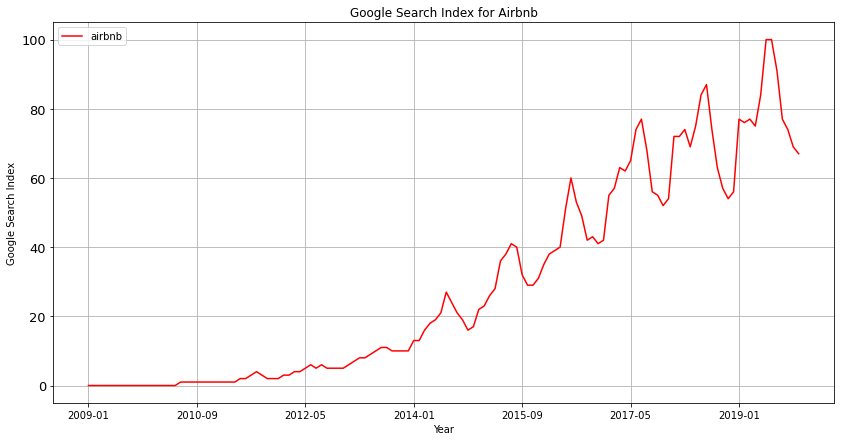

In [259]:
ax = google.plot(x='month', y='airbnb', colormap='prism', figsize=(14, 7))
ax.set_xlabel('Year')
ax.set_ylabel('Google Search Index')
ax.set_title('Google Search Index for Airbnb')
plt.grid()
plt.show()